In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [82]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_epochs=50):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for epoch in range(self.n_epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= 100*self.lr * db
            
            # Track loss (MSE)
            loss = np.mean((y_pred - y)**2)
            self.loss_history.append(loss)
            
            # Yield current state for animation
            yield epoch, self.weights.copy(), self.bias.copy(), loss
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [84]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
true_slope = 1.5
true_intercept = 0
y = true_slope * X + true_intercept + np.random.randn(100, 1) * 1
y = y.reshape(-1)

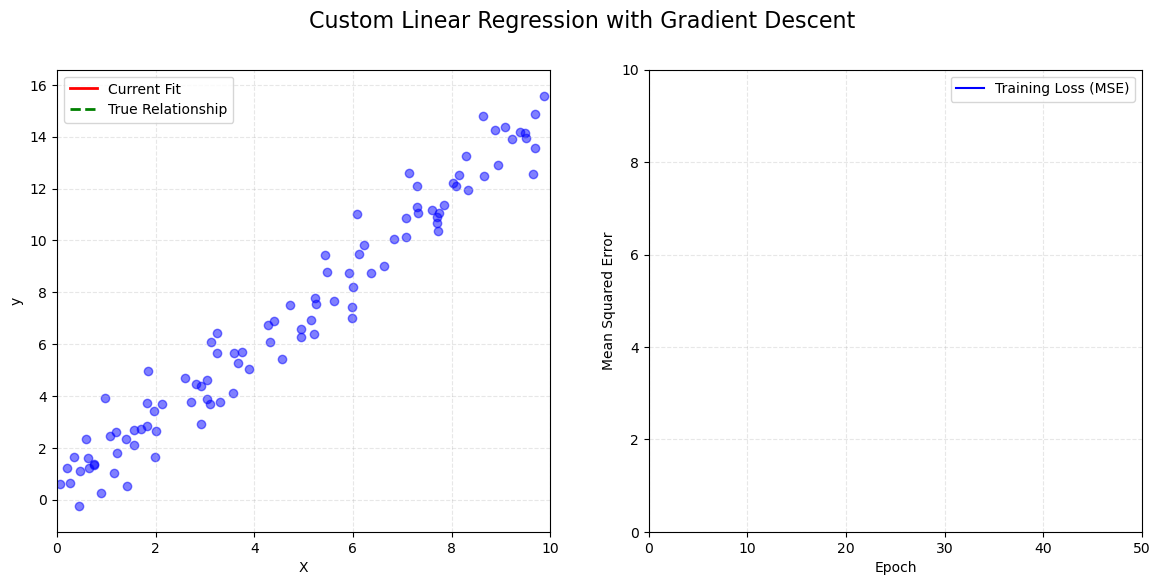

In [86]:
# Create figure
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Custom Linear Regression with Gradient Descent', fontsize=16)

# Data plot
scatter = ax1.scatter(X, y, color='blue', alpha=0.5)
line, = ax1.plot([], [], 'r-', linewidth=2, label='Current Fit')
true_line, = ax1.plot([], [], 'g--', linewidth=2, label='True Relationship')
ax1.set_xlim(0, 10)
ax1.set_ylim(np.min(y)-1, np.max(y)+1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)

# Error plot
loss_line, = ax2.plot([], [], 'b-', label='Training Loss (MSE)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Squared Error')
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 10)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.3)

In [87]:
# Initialize regression
model = LinearRegression(learning_rate=0.01, n_epochs=50)
generator = model.fit(X, y)

In [90]:
# Animation function
def update(frame):
    epoch, weights, bias, loss = next(generator)
    
    # Update regression line
    x_vals = np.array([0, 10])
    y_vals = weights * x_vals + bias
    line.set_data(x_vals, y_vals)
    
    # Update true relationship line (once)
    if epoch == 0:
        true_y = true_slope * x_vals + true_intercept
        true_line.set_data(x_vals, true_y)
    
    # Update error plot
    loss_line.set_data(np.arange(epoch+1), model.loss_history)
    ax2.set_ylim(0, max(model.loss_history)*1.1)
    
    # Update titles
    ax1.set_title(f'Epoch {epoch+1}\ny = {weights[0]:.2f}x + {bias:.2f}\nTrue: y = {true_slope}x + {true_intercept}')
    ax2.set_title(f'MSE: {loss:.2f}')
    
    return line, loss_line

# Create animation
ani = FuncAnimation(
    fig, 
    update, 
    frames=50, 
    interval=200,
    blit=False,
    repeat=False
)

plt.tight_layout()
plt.show()

# To save the animation (uncomment):
ani.save('finalLinearRegression-withoutLibrary+GIF.gif', writer='pillow', fps=5)

<Figure size 640x480 with 0 Axes>

StopIteration: 